# LA Crime Forecast

This page presents a simple time-series forecast of daily crime counts in Los Angeles, based on the city’s historical crime incident data.

In [7]:
import pandas as pd

# load LA data
df = pd.read_csv("data/los_angeles.csv")

df["incident_date"] = pd.to_datetime(df["incident_date"], errors="coerce")

# only keep date
df = df.dropna(subset=["incident_date"])

# daily crime count
daily = df.groupby("incident_date").size().reset_index(name="crime_count")

print(daily.head())
print(daily.tail())


  incident_date  crime_count
0    2020-01-01         1164
1    2020-01-02          528
2    2020-01-03          596
3    2020-01-04          541
4    2020-01-05          506
     incident_date  crime_count
1874    2025-03-25            2
1875    2025-03-26            1
1876    2025-04-29            1
1877    2025-05-25            1
1878    2025-05-29            1


In [3]:
daily_prophet = daily.rename(columns={"incident_date": "ds", "crime_count": "y"})

print(daily_prophet.head())


          ds     y
0 2020-01-01  1164
1 2020-01-02   528
2 2020-01-03   596
3 2020-01-04   541
4 2020-01-05   506


In [ ]:
from prophet import Prophet

# build model
m = Prophet()

# train model
m.fit(daily_prophet)

# predict future crime
future = m.make_future_dataframe(periods=30)  # 30 can change to 60、90

# prediction
forecast = m.predict(future)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


20:45:23 - cmdstanpy - INFO - Chain [1] start processing
20:45:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1904,2025-06-24,-172.321522,-265.789475,-78.812591
1905,2025-06-25,-159.221329,-247.370573,-66.765010
1906,2025-06-26,-162.854762,-251.734428,-72.197464
1907,2025-06-27,-120.633397,-217.828916,-25.846303
1908,2025-06-28,-143.151121,-236.293077,-58.580792


# Future 30 days Crime Prediction

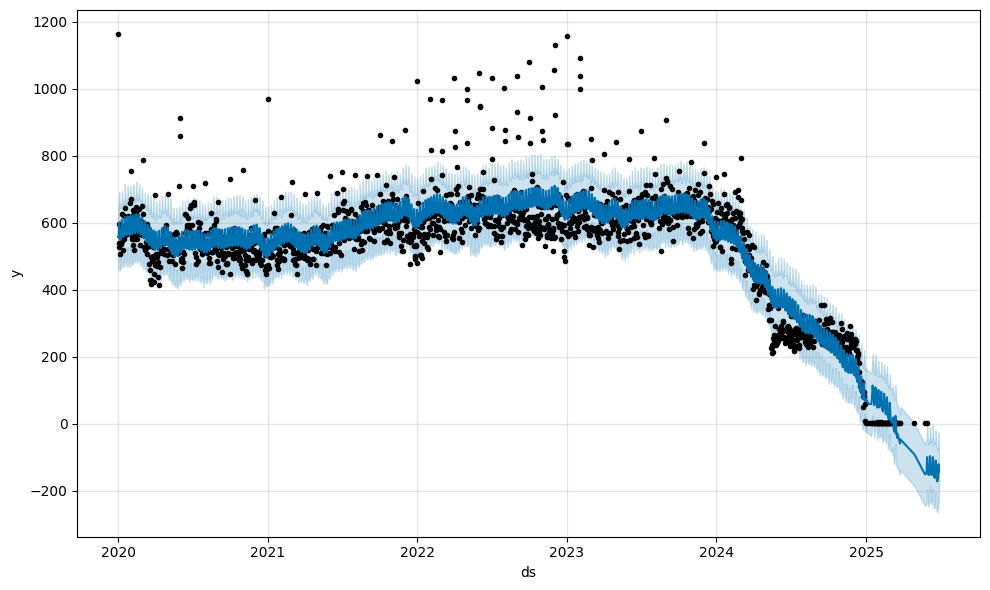

In [5]:
import matplotlib.pyplot as plt

fig = m.plot(forecast)
plt.show()


## Los Angeles Crime Trend and Seasonal Patterns (Prophet Decomposition)

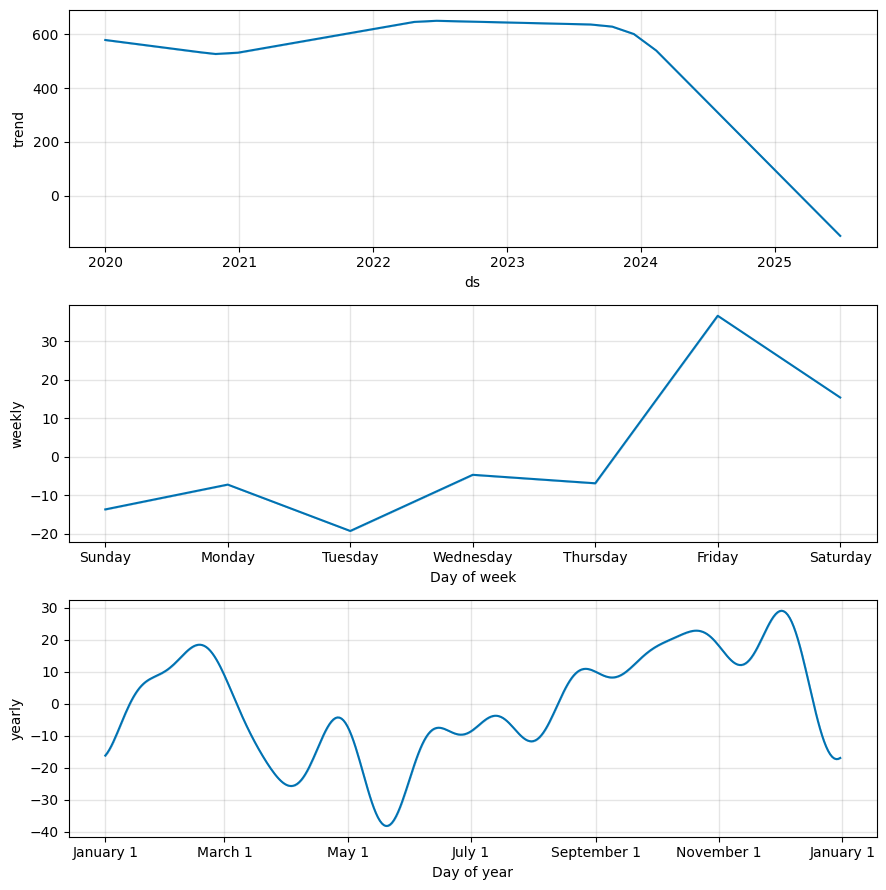

In [6]:
fig2 = m.plot_components(forecast)
plt.show()
